In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = sns.load_dataset('titanic')  # Titanic dataset from seaborn
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Overview of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Basic stats
print(df.describe())

# Unique values in 'survived'
print(df['survived'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
survived         0
pclass           0
sex              0
age            17

In [15]:
# Drop rows with missing values in selected columns
df_clean = df[['pclass', 'sex', 'age', 'fare', 'embarked', 'survived']].dropna()

# Convert categorical columns to numerical
df_clean['sex'] = df_clean['sex'].map({'male': 0, 'female': 1})
df_clean['embarked'] = df_clean['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Feature matrix (X) and target vector (y)
X = df_clean.drop('survived', axis=1)
y = df_clean['survived']


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7902097902097902

Confusion Matrix:
[[73  7]
 [23 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143



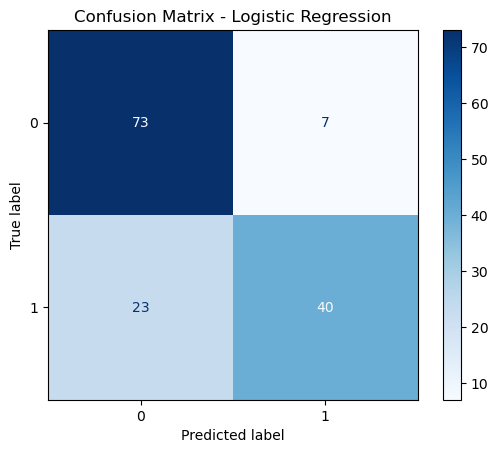

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


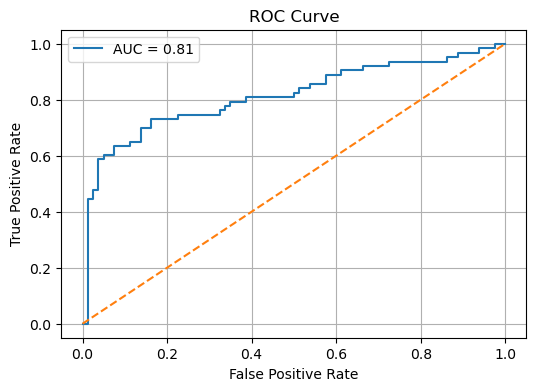

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get prediction probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# L1 Regularized (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

# L2 Regularized (Ridge)
model_l2 = LogisticRegression(penalty='l2', solver='liblinear')
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)

# Compare Accuracies
print("L1 Regularization (Lasso):")
print("Accuracy:", accuracy_score(y_test, y_pred_l1))
print("Classification Report:\n", classification_report(y_test, y_pred_l1))

print("--------------------------------------------------")

print("L2 Regularization (Ridge):")
print("Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Classification Report:\n", classification_report(y_test, y_pred_l2))


L1 Regularization (Lasso):
Accuracy: 0.7902097902097902
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143

--------------------------------------------------
L2 Regularization (Ridge):
Accuracy: 0.7832167832167832
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.82        80
           1       0.83      0.63      0.72        63

    accuracy                           0.78       143
   macro avg       0.80      0.77      0.77       143
weighted avg       0.79      0.78      0.78       143



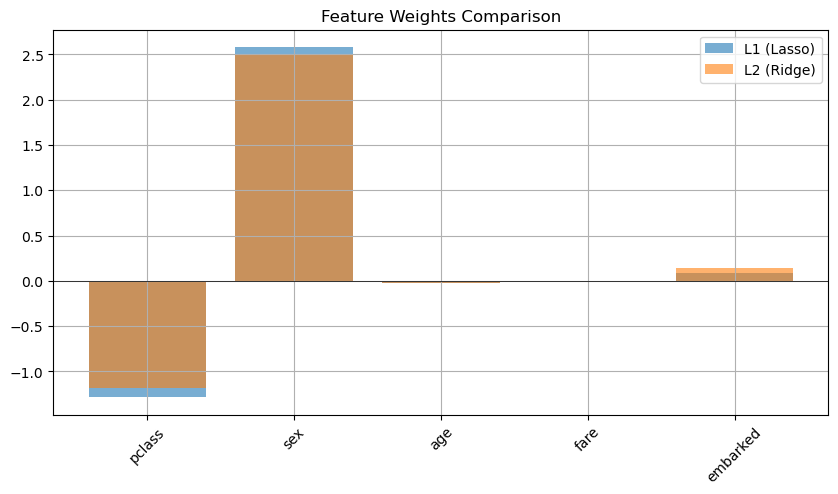

In [29]:
features = X.columns

plt.figure(figsize=(10, 5))
plt.bar(features, model_l1.coef_[0], alpha=0.6, label="L1 (Lasso)")
plt.bar(features, model_l2.coef_[0], alpha=0.6, label="L2 (Ridge)")
plt.title("Feature Weights Comparison")
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
